## Our Goal is to predict the salary associated with the level of position.
**We will also find out whether Linear Regression or a Polynomial Model does a better Prediction for the Dataset.**

In [1]:
dataset = read.csv('Position_Salaries.csv')
dataset

Position,Level,Salary
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000
CEO,10,1000000


In [2]:
dataset = dataset[2:3] # Reset the dataset

In [3]:
dataset

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


In [4]:
# Fitting Linear Regression to the dataset
lin_reg = lm(formula = Salary ~ .,
             data = dataset)
summary(lin_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


In [6]:
# Fitting Polynomial Regression to the dataset
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
poly_reg = lm(formula = Salary ~ .,
              data = dataset)

summary(poly_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-75695 -28148   7091  29256  49538 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -121333.3    97544.8  -1.244  0.25994   
Level        180664.3    73114.5   2.471  0.04839 * 
Level2       -48549.0    15081.0  -3.219  0.01816 * 
Level3         4120.0      904.3   4.556  0.00387 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50260 on 6 degrees of freedom
Multiple R-squared:  0.9812,	Adjusted R-squared:  0.9718 
F-statistic: 104.4 on 3 and 6 DF,  p-value: 1.441e-05


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


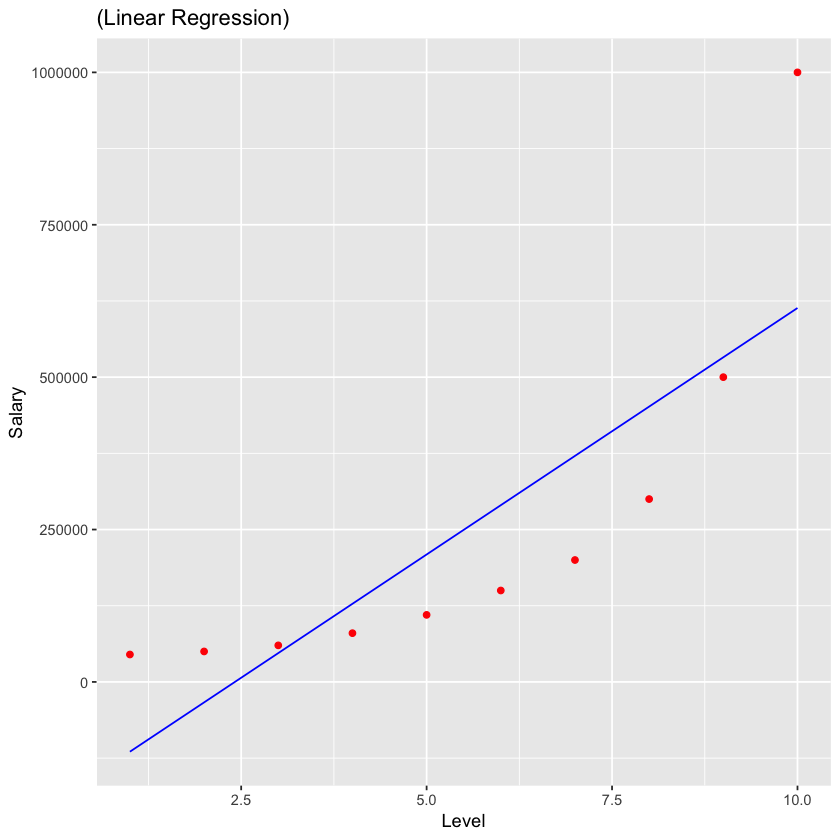

In [7]:
# Visualising the Linear Regression results
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('(Linear Regression)') +
  xlab('Level') +
  ylab('Salary')

**The Prediction is not close accurate with the actual values.**

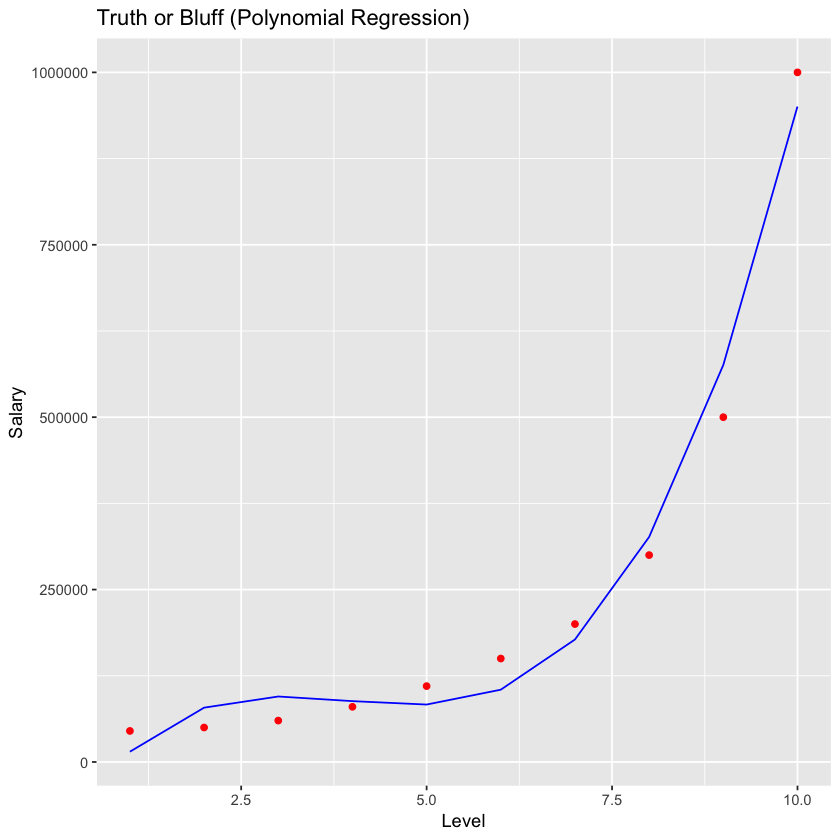

In [8]:
# Visualising the Polynomial Regression results
# install.packages('ggplot2')
# library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(poly_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

**Polynomial Regression is better in predicting the values with the actual values and its clear with the non-linear Trend line.**

In [9]:
# Predicting a new result with Linear Regression
predict(lin_reg, data.frame(Level = 6.5))

1 
330378.8

In [10]:
# Predicting a new result with Polynomial Regression
predict(poly_reg, data.frame(Level = 6.5,
                             Level2 = 6.5^2,
                             Level3 = 6.5^3,
                             Level4 = 6.5^4))

1 
133259.5

In [11]:
dataset

Level,Salary,Level2,Level3
1,45000,1,1
2,50000,4,8
3,60000,9,27
4,80000,16,64
5,110000,25,125
6,150000,36,216
7,200000,49,343
8,300000,64,512
9,500000,81,729
10,1000000,100,1000
